In [1]:
import os
os.chdir('/content/drive/MyDrive/Study/python_studying/Numpy/datasets')

## 1. Numpy
Numpy는 python 라이브러리로, 계산 과학을 수행하기 위한 기초 툴박스이다. <br>
기본적인 가공이 가능한, 유용한 선형대수 함수를 사용할 수 있는 다차원 배열을 지원한다.

Numpy를 이용해서 간단한 matrix 계산을 해본다.

In [2]:
import numpy as np

u = np.array([2,2])
v = np.array([2,3])
w = np.array([3,5])

result = u+v+w
print(result)

[ 7 10]


In [3]:
u = np.array([1,2,3])
v = np.array([4,4,4,])
alpha = 2

result = alpha*(u+v)
print(result)

[10 12 14]


Numpy를 이용한 array 추출<br> <br>
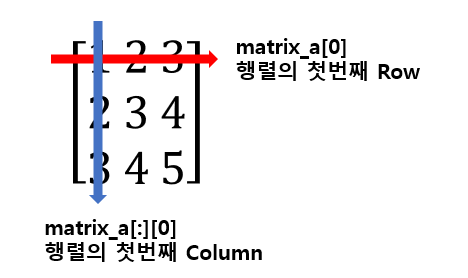

In [4]:
matrix_a = np.array([
                     [1,2,3],
                     [2,3,4],
                     [3,4,5]
])

print('matrix_a')
print(matrix_a)
print('-----------------------------------')
print('matrix_a의 0번째 Row = ',matrix_a[0])
print('matrix_a의 0번째 Row = ',matrix_a[:,2])
print('matrix_a의 0번째 Row 중 2번째 Column = ',matrix_a[0,2])
print('matrix_a의 0번째 Row 중 2번째 Column = ',matrix_a[0][2])

matrix_a
[[1 2 3]
 [2 3 4]
 [3 4 5]]
-----------------------------------
matrix_a의 0번째 Row =  [1 2 3]
matrix_a의 0번째 Row =  [3 4 5]
matrix_a의 0번째 Row 중 2번째 Column =  3
matrix_a의 0번째 Row 중 2번째 Column =  3


#### Numpy를 이용한 선형계 문제 해결
<br>

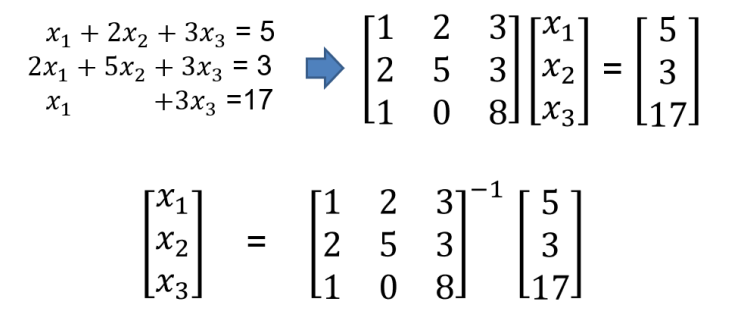

In [5]:
matrix_a = np.array([
                     [1,2,3],
                     [2,5,3],
                     [1,0,8]
])
matrix_a_inverse = np.linalg.inv(matrix_a)
matrix_b = np.array([
                     [5],[3],[17]
])

x = np.dot(matrix_a_inverse,matrix_b)
x

array([[ 1.],
       [-1.],
       [ 2.]])

#### Numpy를 이용한 얼굴 합성 예제

In [6]:
image_a = np.load('image_a.npy')
image_b = np.load('image_b.npy')
image_c = np.load('image_c.npy')
image_d = np.load('image_d.npy')

In [7]:
image_a

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

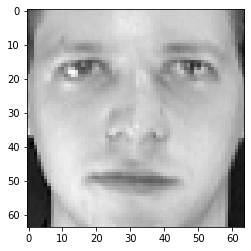

In [8]:
import matplotlib.pyplot as plt

plt.imshow(image_a)
plt.gray()
plt.show()

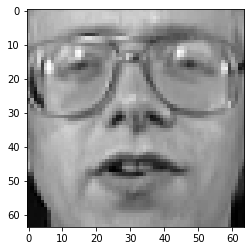

In [9]:
plt.imshow(image_b)
plt.gray()
plt.show()

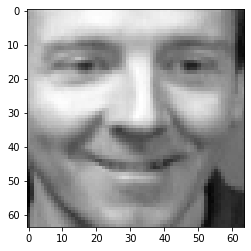

In [10]:
plt.imshow(image_c)
plt.gray()
plt.show()

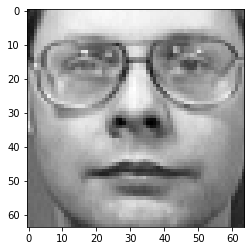

In [11]:
plt.imshow(image_d)
plt.gray()
plt.show()

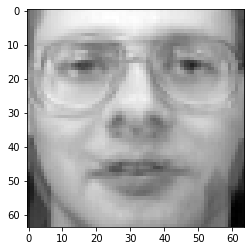

In [12]:
new_image = image_a/4+image_b/4+image_c/4+image_d/4

plt.imshow(new_image)
plt.show()

#### Numpy를 이용한 동력계 문제 해결
- 동력계란 시간에 따라 값이 변하는 변수들의 유한 집합을 말한다.
- 어떤 시점(t)에서의 변수값을 <u>변수의 상태</u>라고 한다.
예제<br>

경쟁관계에 있는 두 개의 TV 채널 1과 채널2는 초기 시장 점유율이 50%로 동일하다. 하지만 시간이 지날수록 변한다.<br>
1년마다 채널1은 채널2의 시청률의 10%를 잠식하고, 채널2는 채널1의 시청률 20%를 잠식한다.<br>
5년 후 각 채널의 시장 점유율은?

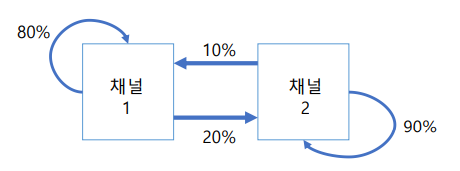

In [13]:
matrix_a = np.array([
                     [0.8,0.1], #채널1의 유지비와 잠식비
                     [0.2,0.9] # 채널2의 잠식비와 유지비
])
init_vector = np.array([[0.5,0.5]])

In [14]:
x0 = init_vector.T # 행렬 연산을 할 수 있도록 전치행렬로 만들어준다.
x0

array([[0.5],
       [0.5]])

In [15]:
# 1년 후
x1 = np.dot(matrix_a, x0)
x1

array([[0.45],
       [0.55]])

In [16]:
# 2년 후
x2 = np.dot(matrix_a, x1)
x2

array([[0.415],
       [0.585]])

In [17]:
def x(t):
  matrix_a = np.array([
                      [0.8,0.1], #채널1의 유지비와 잠식비
                      [0.2,0.9] # 채널2의 잠식비와 유지비
  ])
  init_vector = np.array([0.5,0.5])

  if t ==0:
    xt = init_vector
    return xt
  else:
    xt = init_vector
    for i in range(t):
      xt = matrix_a.dot(xt) # matrix_a.dot 연산과 np.dot()연산의 결과 다름 왜?
    return xt

In [18]:
for i in range(4):
  print("{}년 째의 각 채널의 점유율:{}".format(i,x(i)))

0년 째의 각 채널의 점유율:[0.5 0.5]
1년 째의 각 채널의 점유율:[0.45 0.55]
2년 째의 각 채널의 점유율:[0.415 0.585]
3년 째의 각 채널의 점유율:[0.3905 0.6095]
